## Import Library

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#from sklearn.linear_model import LinearRegression, LogisticRegression

## Read Excel File

In [2]:
df = pd.read_excel('FinalCovid.xlsx')

In [3]:
y = df["Tổng"]
x = range(1, len(y) + 1, 1)

## Polynomial Regression

In [74]:
class PolynomialRegression():
    def __init__(self, depth= 1) -> None:
        self.depth = depth
        self.beta = [0]*depth

    def fit(self, X_train, Y_train):
        train_x = np.array(X_train)
        train_y = np.array(Y_train)

        n = len(X_train)

        depth = self.depth
        temp = np.ones((n,1))


        t = np.ones((1,n))
        for i in range(depth):
            t = t*train_x
            temp = np.concatenate((temp, t.T), axis=1)
        self.beta = (np.linalg.inv(np.dot(temp.T,temp)))@temp.T@train_y.T

    def predict(self, X_test):
        test_x = np.array(X_test)
        beta = self.beta
        y_prediction = 0
        for i in range(len(beta)):
            y_prediction+=beta[i]*(test_x**i)
        return y_prediction

    def SSe(self, Y_prediction, Y_test):
        y_prediction = Y_prediction
        test_y = np.array(Y_test)
        epsilon = test_y - y_prediction
        loss = epsilon.T @ epsilon
        return loss

    def BIC(self,X_test, Y_test):
        return len(X_test)*np.log(self.SSe(self.predict(X_test), Y_test)) + len(self.beta)*len(X_test)


In [101]:
def visualize(X_, Y_, polyModel):
   plt.scatter(X_, Y_, color = 'blue')
   result = polyModel.predict(X_)
   plt.plot(X_, result, color = 'red')
   plt.title('Polynomial Regression')
   plt.xlabel('Day')
   plt.ylabel('Covid Cases')

   plt.show()

In [102]:
LEFT = 1
RIGHT = 10
rangeDepth = range(LEFT, RIGHT + 1, 1)

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

BIC loss for model:



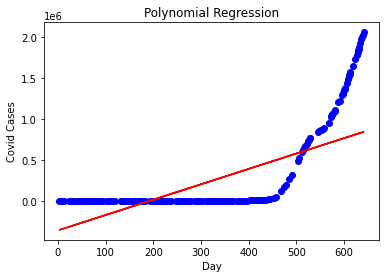

Witd d = 1, BIC = 7041.449


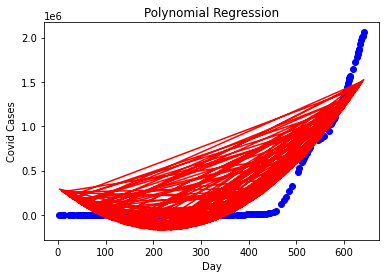

Witd d = 2, BIC = 6921.174


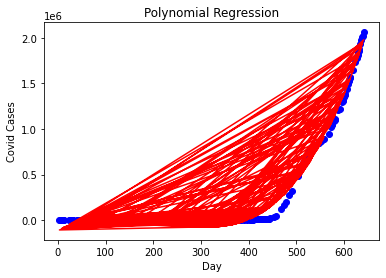

Witd d = 3, BIC = 6667.181


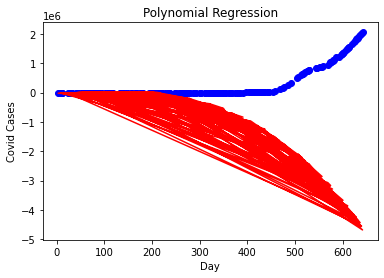

Witd d = 4, BIC = 8469.501


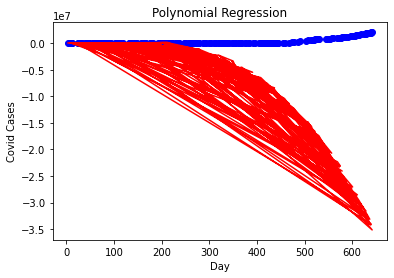

Witd d = 5, BIC = 9424.271


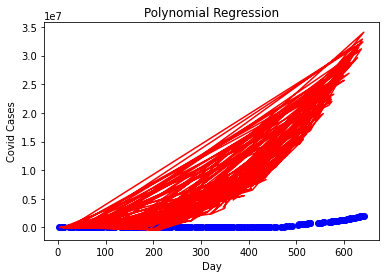

Witd d = 6, BIC = 9588.386


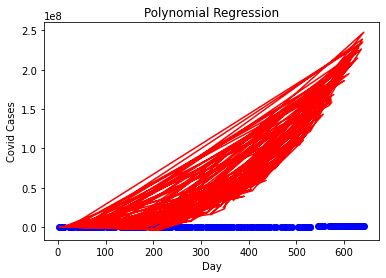

Witd d = 7, BIC = 10662.501


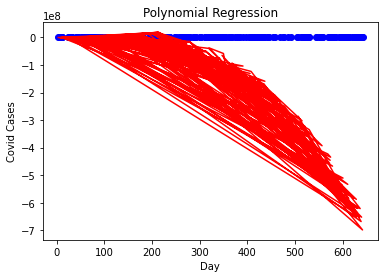

Witd d = 8, BIC = 11318.659


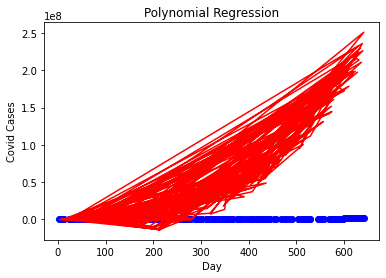

Witd d = 9, BIC = 11084.677


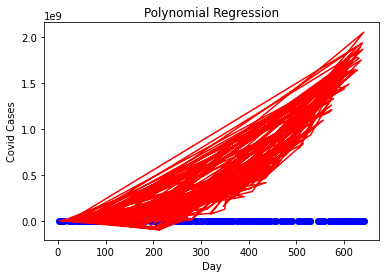

Witd d = 10, BIC = 12197.004


In [104]:
print("BIC loss for model:\n")
ArrLoss = []
for d in rangeDepth:
   polyModel = PolynomialRegression(depth=d)
   polyModel.fit(X_train, Y_train)
   BIC_d = polyModel.BIC(X_test, Y_test)
   ArrLoss.append(BIC_d)
   visualize(X_test, Y_test, polyModel)
   print("Witd d = %d, BIC = %.3f"%(d, BIC_d))

In [86]:
bestDepth = ArrLoss.index(min(ArrLoss))
print("The best depth is %d with BIC = %.3f"%(bestDepth + LEFT, ArrLoss[bestDepth]))

The best depth is 3 with BIC = 6667.181
